#**6-8.2**

**6_Фиктивные переменные**

**7_Авторегрессия**

**8.1_АРИМА!!!!_1(SARIMA,greedsearch)**

**8.2_АРИМА!!!!_2(вручную)**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DOM')

In [ ]:
!pip install --upgrade xlrd

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import durbin_watson
from pandas.plotting import autocorrelation_plot
import scipy.stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
filename='Electric_Production.csv'
df=pd.read_csv(filename)

In [ ]:
df.DATE = pd.to_datetime(df.DATE)

In [ ]:
df = df[df['DATE'] != '2018-01-01']

In [ ]:
df.head(5)

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [ ]:
df = df.rename(columns={'IPG2211A2N': 'vt'})

In [ ]:
df = df.set_index('DATE')

In [ ]:
series = df.squeeze()

In [ ]:
series

In [ ]:
pd.set_option('precision', 2)

In [ ]:
df.shape

(396, 1)

In [ ]:
y = series.values
y

In [ ]:
x = np.arange(1,len(y)+1)

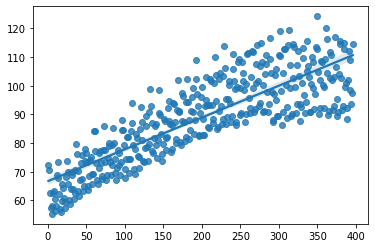

In [ ]:
sns.regplot(x=x,y=y,data=series)

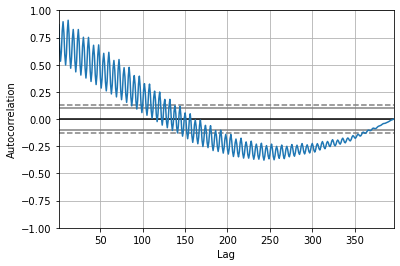

In [ ]:
autocorrelation_plot(y)
plt.show()

In [ ]:
series

In [ ]:
dataframe=pd.DataFrame()

In [ ]:
# альтернатива задать столбцы с датами !!!!!!!!!!!!!!!!!!!!!!!!!(это для справки, не использовал)
dataframe['month']=series.index.month # в моих данных месяцы и дни перепутаны
dataframe['year']=series.index.year
dataframe['price']=series.values
dataframe['t']=np.arange(1, len(series) + 1)

In [ ]:
dataframe

In [ ]:
dataframe.month.value_counts()

In [ ]:
dataframe.month=dataframe.month.astype(object)

In [ ]:
dataframe=pd.get_dummies(dataframe)
dataframe.sample(10)

,year,price,t,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
72,1991,86.02,73,1,0,0,0,0,0,0,0,0,0,0,0
274,2007,93.91,275,0,0,0,0,0,0,0,0,0,0,1,0
19,1986,64.48,20,0,0,0,0,0,0,0,1,0,0,0,0
38,1988,70.29,39,0,0,1,0,0,0,0,0,0,0,0,0
261,2006,90.37,262,0,0,0,0,0,0,0,0,0,1,0,0
42,1988,72.98,43,0,0,0,0,0,0,1,0,0,0,0,0
384,2017,114.85,385,1,0,0,0,0,0,0,0,0,0,0,0
348,2014,124.25,349,1,0,0,0,0,0,0,0,0,0,0,0
321,2011,90.36,322,0,0,0,0,0,0,0,0,0,1,0,0
10,1985,58.00,11,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dataframe.drop('month_1',axis=1,inplace=True) #удалил 1 месяц для порядка

In [ ]:
dataframe.shape

(396, 14)

In [ ]:
array=dataframe.values
array

**создаем x и y (тренировочная и тестовая выборки)**

In [ ]:
x_train=array[0:324,2:14]

In [ ]:
y_train=array[0:324,1]

In [ ]:
x_test =array[324:,2:14]

In [ ]:
y_test =array[324:,1]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
t=x_train.reshape(-1,1) # превращаем строчку в столбец

In [ ]:
model=LinearRegression().fit(x_train,y_train)

In [ ]:
model.intercept_ # это данные для справки, все уже вшито в model

76.48291988960145

In [ ]:
model.coef_ # это данные для справки, все уже вшито в model

array([  0.13518289,  -6.74435326, -12.84408429, -21.25432644,
       -21.54714266, -14.22806629,  -7.2910677 ,  -6.8256654 ,
       -15.29757051, -21.30648673, -18.73012888,  -6.55671918])

In [ ]:
y_pred=model.predict(x_test) # прагноз для тестовой выборки
y_pred

In [ ]:
R2=r2_score(y_test, y_pred) # фсё круто
R2

-0.455545870819833

In [ ]:
MSE=mean_squared_error(y_test, y_pred)
MSE

122.6754149863322

**18.	Постройте на всех данных лучшую модель. Если это тренд-сезонная модель, то сделать это надо по аналогии с пп.9-12.**

In [ ]:
x=array[:,2:14]
y=array[:,1]

In [ ]:
model=LinearRegression().fit(x,y)

In [ ]:
model.intercept_

79.74516742006449

In [ ]:
model.coef_

array([  0.11154229,  -7.28885139, -13.59322398, -22.47293901,
       -22.30463282, -14.41463572,  -6.99716892,  -6.88377788,
       -15.68077775, -22.06758974, -19.25237446,  -6.74218948])

In [ ]:
y_pred=model.predict(x)
y_pred

**19.	Оцените точность модели для всех данных с помощью следующих показателей: коэффициента детерминации, MAE, MSE, RMSE. Соответствующие функции приведены в задании 4. Прокомментируйте полученные результаты.**

In [ ]:
R2=r2_score(y, y_pred)
R2

0.9153168522770742

In [ ]:
MSE=mean_squared_error(y, y_pred)
MSE

19.69908726094721

In [ ]:
MAE=mean_absolute_error(y, y_pred)
MAE

3.6177544320488746

In [ ]:
RMSE=sqrt(MSE)
RMSE

4.438365381640769

**20.	Рассчитайте ошибки модели для всех данных. Поместите столбец ошибок 'Error' в таблицу исходных данных. Выведите на экран первые 5 наблюдений.**

In [ ]:
df['Error']=y-y_pred
df.head()

,vt,Error
DATE,,
1985-01-01,72.51,-7.35
1985-02-01,70.67,-2.01
1985-03-01,62.45,-4.04
1985-04-01,57.47,-0.25
1985-05-01,55.32,-2.68


**21.	Постройте линейный график ошибок, воспользовавшись функциями plot() и show() из модуля matplotlib.pyplot. Прокомментируйте результат.**

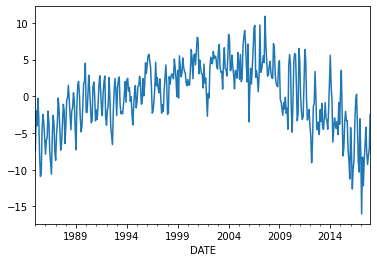

In [ ]:
df.Error.plot()
plt.show()

**22.	Выведите на экран описательные статистики ошибок, воспользовавшись функцией describe(). Прокомментируйте результат.**

In [ ]:
df.Error.describe()

count    3.96e+02
mean    -1.25e-14
std      4.44e+00
min     -1.60e+01
25%     -2.89e+00
50%      3.61e-01
75%      3.25e+00
max      1.09e+01
Name: Error, dtype: float64

**23.	Постройте для ошибок гистограмму на основе функции hist(), ядерную оценку плотности на основе функции plot(kind='kde'), Q-Q график на основе функции qqplot() из модуля statsmodels.graphics.gofplots, а также функцией show() из matplotlib.pyplot. Прокомментируйте результат.**

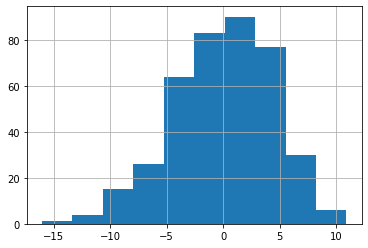

In [ ]:
df.Error.hist()
plt.show()

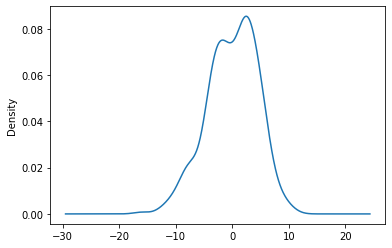

In [ ]:
df.Error.plot(kind='kde')
plt.show()

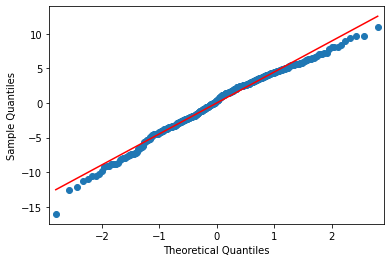

In [ ]:
qqplot(df.Error,line='r')
plt.show()

In [ ]:
d=durbin_watson(df.Error)
d

0.41234226631661125

In [ ]:
4-d

3.587657733683389

n=48, k=1, alfa=0.05. Для n=50 и k=1, alfa=0.05 dl=1.5, du=1.59.
4-d>du, поэтому гипотеза об отсутствии автокорреляции не отвергается.

**24.	Постройте для ошибок модели коррелограмму, воспользовавшись функцией autocorrelation_plot() из модуля pandas.plotting. Прокомментируйте результат.**

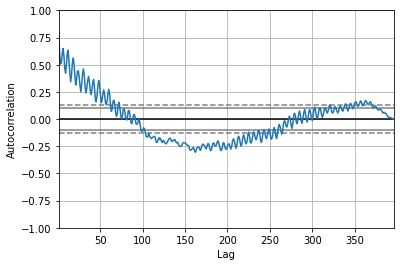

In [ ]:
autocorrelation_plot(df.Error)
plt.show()

**25.	Рассчитайте среднее квадратичное отклонение, воспользовавшись функцией sem() из модуля scipy.stats. Запишите результат в переменную sigma и выведите его на экран.**

In [ ]:
sigma =scipy.stats.sem(y)
sigma

0.767407444432628

**26.	Рассчитайте двусторонний t критерий Стьюдента для существующего объема выборки и 95% достоверности результата (confidence). Воспользуйтесь функцией t.ppf((1 + confidence) / 2., len(y)-1) из модуля scipy.stats. Запишите результат в переменную tstu и выведите его на экран.**

In [ ]:
confidence=0.95

In [ ]:
tstu=scipy.stats.t.ppf((1 + confidence) / 2., len(y)-1)
tstu

1.9659878660672252

**27.	Сгенерируйте номера наблюдений для прогнозного интервала, равного 12 месяцев, - с 49 по 60 наблюдение. Результат представьте в виде столбца. Для этого воспользуйтесь функцией reshape(-1,1) . Запишите результат в переменную t_new и выведите его на экран.**

In [ ]:
t_new =np.arange(len(y)+1, len(y)+13)
t_new

array([397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408])

In [ ]:
t_new=t_new.reshape(-1,1)
t_new

array([[397],
       [398],
       [399],
       [400],
       [401],
       [402],
       [403],
       [404],
       [405],
       [406],
       [407],
       [408]])

**28.	Подготовьте значения фиктивных переменных для прогнозного интервала, равного 1 году в помесячной разбивке. Запишите результат в переменную d и выведите его на экран.**

In [ ]:
array=dataframe.values
array

In [ ]:
d=array[0:12,3:14]
d

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

**29.	Создайте на основе переменных t_new и d объекты DataFrame - df_t_new и df_d, воспользовавшись функцией DataFrame() из модуля pandas.**

In [ ]:
df_t_new =pd.DataFrame(t_new)

In [ ]:
df_d=pd.DataFrame(d)

**30.	Объедините их, воспользовавшись функцией concat([df_t_new,df_d],axis=1,names=['t', 'd2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12']) из модуля pandas. Запишите результат в переменную x_new и выведите его на экран.**

In [ ]:
x_new=pd.concat([df_t_new,df_d],axis=1,names=['t', 'd2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12'])
x_new

,0,0,1,2,3,4,5,6,7,8,9,10
0,397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,398,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,399,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,401,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,402,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,403,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,404,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**31.	Найдите прогнозные значения цены на материал 2 на год вперед (точечный прогноз), воспользовавшись функцией predict() модели линейной регрессии. Запишите результат в переменную y_new и выведите его на экран.**

In [ ]:
y_new =model.predict(x_new)
y_new

array([124.02745843, 116.85014934, 110.65731903, 101.88914631,
       102.16899479, 110.17053419, 117.69954328, 117.92447661,
       109.23901903, 102.96374934, 105.89050691, 118.51223419])

**32.	Рассчитайте верхнюю границу прогнозного интервала, воспользовавшись формулой: y_up=y_new+tstu*sigma. Выведите результат на экран.**

In [ ]:
y_up=y_new+tstu*sigma
y_up

array([125.53617215, 118.35886306, 112.16603276, 103.39786003,
       103.67770852, 111.67924791, 119.208257  , 119.43319033,
       110.74773276, 104.47246306, 107.39922064, 120.02094791])

**33.	Рассчитайте нижнюю границу прогнозного интервала, воспользовавшись формулой: y_down=y_new-tstu*sigma. Выведите результат на экран.**

In [ ]:
y_down=y_new-tstu*sigma
y_down

array([122.5187447 , 115.34143561, 109.14860531, 100.38043258,
       100.66028107, 108.66182046, 116.19082955, 116.41576289,
       107.73030531, 101.45503561, 104.38179319, 117.00352046])

**34.	Нанесите на одну диаграмму фактические значения, значения по модели, точечный и интервальный прогнозы, воспользовавшись функциями figure(), scatter(), plot(), xlabel(), ylabel(), legend() и show() из модуля matplotlib.pyplot.**

In [ ]:
len(y_pred)

396

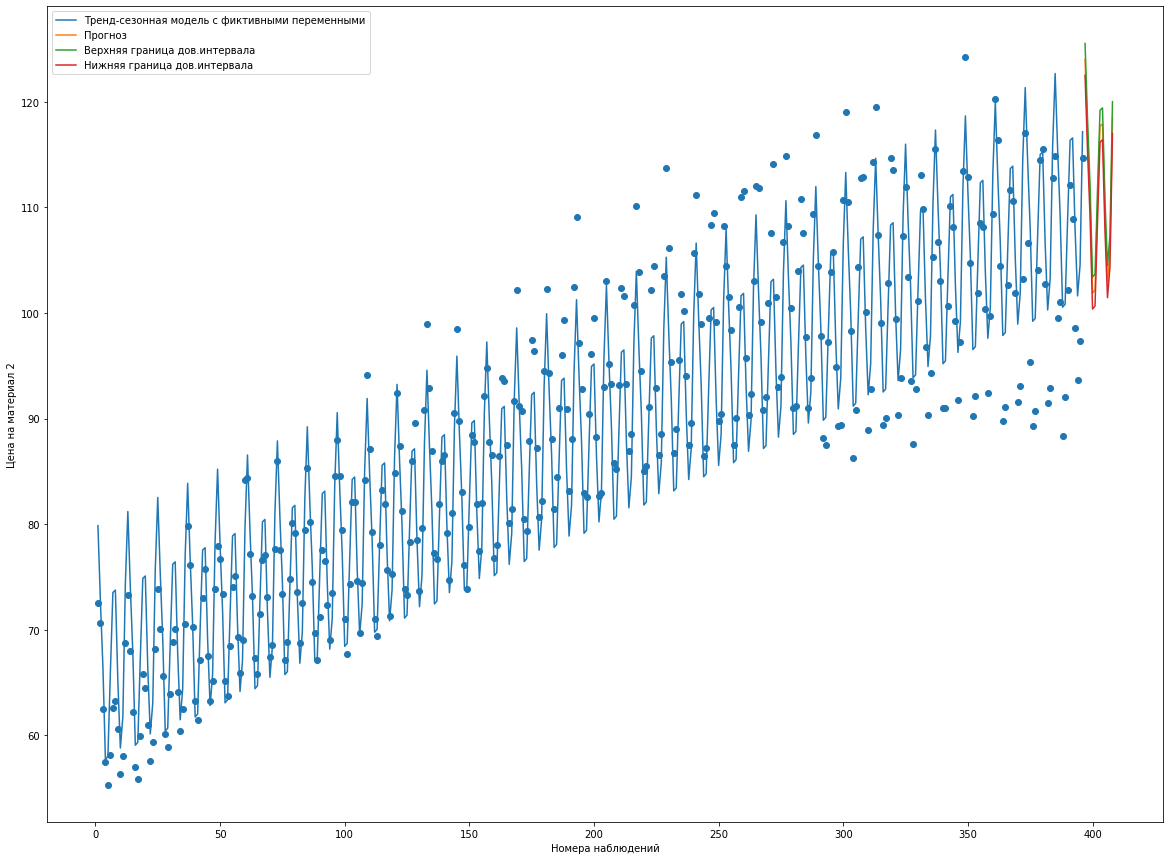

In [ ]:
plt.figure(figsize=(20,15))

plt.scatter(dataframe.t,y)

plt.plot(dataframe.t,y_pred)
plt.plot(t_new,y_new)
plt.plot(t_new,y_up)
plt.plot(t_new,y_down)

plt.xlabel('Номера наблюдений')
plt.ylabel('Цена на материал 2')
plt.legend(['Тренд-сезонная модель с фиктивными переменными','Прогноз','Верхняя граница дов.интервала','Нижняя граница дов.интервала'])

plt.show()

In [ ]:
plt.scatter(x,y)